In [103]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
%matplotlib inline

In [15]:
file = open("song_tf_idf.pickle",'rb')
song_tf_idf = pickle.load(file)

file = open("wiki_tf_idf.pkl",'rb')
wiki_tf_idf = pickle.load(file)

In [135]:
svd_tf_idf = np.append(song_tf_idf.toarray(), wiki_tf_idf, axis=0)

In [136]:
from scipy.sparse.linalg import svds
# do SVD with a very large k (we usually use 100), just for the sake of getting many sorted singular values (aka importances)
u,s,v_trans = svds(svd_tf_idf, k=100)

In [137]:
print(u.shape)
print(s.shape)
print(v_trans.shape)

(34560, 100)
(100,)
(100, 13784)


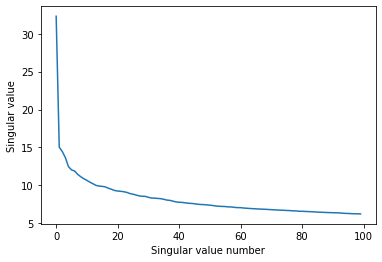

In [138]:
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [141]:
docs_compressed, s, words_compressed = svds(svd_tf_idf, k=40)
words_compressed = words_compressed.transpose()

In [142]:
print(words_compressed.shape)
print(docs_compressed.shape)

(13784, 40)
(34560, 40)


In [82]:
file = open("word_to_index.pkl",'rb')
word_to_index = pickle.load(file)

file = open("index_to_word.pkl",'rb')
index_to_word = pickle.load(file)

In [143]:
from sklearn.preprocessing import normalize
words_compressed_normed = normalize(words_compressed, axis = 1)

In [144]:
# cosine similarity
def closest_words(word_in, words_representation_in, k = 10):
    if word_in not in word_to_index: return "Not in vocab."
    sims = words_representation_in.dot(words_representation_in[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_word[i],sims[i]) for i in asort[1:]]

In [146]:
td_matrix_np = svd_tf_idf.transpose()
td_matrix_np = normalize(td_matrix_np)

In [153]:
word = 'barbecue'
print("Using SVD:")
for w, sim in closest_words(word, words_compressed_normed):
    try:
        print("{}, {:.3f}".format(w, sim))
    except:
        print("word not found")
print()

Using SVD:
chicken, 0.856
slamming, 0.845
nut, 0.838
slugs, 0.835
bust, 0.834
hints, 0.829
joining, 0.820
mc, 0.816
shite, 0.812
coppers, 0.810



In [56]:
big_df = pd.read_csv('big_df.csv')

In [87]:
docs_compressed_normed = normalize(docs_compressed)

# this is basically the same cosine similarity code that we used before, just with some changes to
# the returned output format to let us print out the documents in a sensible way
def closest_projects(project_index_in, project_repr_in, k = 5):
    sims = project_repr_in.dot(project_repr_in[project_index_in,:])
    asort = np.argsort(-sims)[:k+1]
    return [(big_df['title'].iloc[i],sims[i]) for i in asort[1:]]

In [155]:
td_matrix_np = svd_tf_idf
td_matrix_np = normalize(td_matrix_np)

In [156]:
for i in range(2):
    print("INPUT SONG: "+big_df['title'].iloc[i])
    print("CLOSEST SONGS w SVD:\n")
    for title, score in closest_projects(i, docs_compressed_normed):
        print("{}:{:.3f}".format(title, score))
    print()
    print("Using term-document matrix:")
    for title, score in closest_projects(i, td_matrix_np):
        print("{}:{:.3f}".format(title, score))
    print()
    print("--------------------------------------------------------\n")

INPUT SONG: Fly In
CLOSEST SONGS w SVD:

Glen Close:0.870
Houstatlantavegas:0.865
Set It Off:0.862
Jimmy James:0.857
Thisisme:0.845

Using term-document matrix:
Everything Is Borrowed:0.490
Never Believe You Now:0.460
Crashing Down:0.386
One Mic:0.365
Buffalo Bill:0.348

--------------------------------------------------------

INPUT SONG: Money On My Mind
CLOSEST SONGS w SVD:

Dust Devil:0.846
Sanon Sinulle:0.835
Keely Aimee:0.832
Visionz:0.825
Rugged Ruff:0.821

Using term-document matrix:
Houstatlantavegas:0.294
Nuff Fire:0.273
Dust Devil:0.247
Role Model:0.242
Still Countin My Cash:0.240

--------------------------------------------------------



In [104]:
from dataset import wiki_scraping
f = open('dataset/wiki_scraping/wiki_texts.json')
wiki_texts = json.load(f)
loc_to_index = {cty:i for i, cty in enumerate(wiki_texts.keys())}

In [162]:
def closest_songs_to_wiki(loc, k = 5):
    sims = docs_compressed_normed.dot(docs_compressed_normed[-(loc_to_index[loc] + 1), :])
    asort = np.argsort(-sims)[:k+1]
    return [(big_df['title'].iloc[i],sims[i]) for i in asort[1:]]

for k in wiki_texts.keys():
    print("INPUT WIKI: "+k)
    print("CLOSEST SONGS w SVD:\n")
    for title, score in closest_songs_to_wiki(k, k=5):
        print("{}:{:.3f}".format(title, score))
    print()
    print("Using term-document matrix:")
    for title, score in closest_projects(i, td_matrix_np):
        print("{}:{:.3f}".format(title, score))
    print()
    print("--------------------------------------------------------\n")

INPUT WIKI: New York City
CLOSEST SONGS w SVD:

Ne Te Tue Pas:0.710
Bad Obsession:0.703
Liar:0.699
Hangover Song:0.697
Anders als gedacht:0.689

Using term-document matrix:
Houstatlantavegas:0.294
Nuff Fire:0.273
Dust Devil:0.247
Role Model:0.242
Still Countin My Cash:0.240

--------------------------------------------------------

INPUT WIKI: Budapest
CLOSEST SONGS w SVD:

Bleed Forever:0.810
Wormholes:0.790
The World Is Mine:0.789
Pledging My Time:0.788
Space Olympics:0.768

Using term-document matrix:
Houstatlantavegas:0.294
Nuff Fire:0.273
Dust Devil:0.247
Role Model:0.242
Still Countin My Cash:0.240

--------------------------------------------------------

INPUT WIKI: Tokyo
CLOSEST SONGS w SVD:

Letters Never Sent:0.920
Heart of Chambers:0.905
América 21:0.899
Rainbows End:0.877
The Elements:0.856

Using term-document matrix:
Houstatlantavegas:0.294
Nuff Fire:0.273
Dust Devil:0.247
Role Model:0.242
Still Countin My Cash:0.240

-----------------------------------------------------

In [163]:
big_df.loc[big_df['title']=="Ne Te Tue Pas"]

,Unnamed: 0,title,tag,artist,year,views,features,lyrics,id,song_id,emotions,social_tags,tknzd_lyrics
11216,11216,Ne Te Tue Pas,rap,Don Choa,2007,2852,{},[Couplet 1]\nLe passé est mort mais c'est son ...,354998,TRMWJVZ128F92F286D,[],"[('rap francais', 100), ('conscious hip-hop', ...","['le', 'pass', 'est', 'mort', 'mais', 'cest', ..."


In [164]:
# Once again, basically the same cosine similarity code, but mixing two different matrices
def closest_songs_to_word(word_in, k = 5):
    if word_in not in word_to_index: return "Not in vocab."
    sims = docs_compressed_normed.dot(words_compressed_normed[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(big_df['title'].iloc[i], big_df['artist'].iloc[i],sims[i]) for i in asort[1:]]

In [166]:
print("Top Matches\n")
for title, artist, sim in closest_songs_to_word("georgia"):
    print("{}, {}, {:.4f}".format(title, artist, sim))

Top Matches

I Need This, Chris Brown, 0.2131
Breathe Into Me, Red, 0.2117
Before and After, Lyrics Born, 0.2098
I Gots Ta Get Over, Compton's Most Wanted, 0.2092
I Want You, Kiss, 0.2074


In [167]:
for i in range(20):
    print("Top words in dimension", i)
    dimension_col = words_compressed[:,i].squeeze()
    asort = np.argsort(-dimension_col)
    print([index_to_word[i] for i in asort[:10]])
    print()

Top words in dimension 0
['works', 'majority', 'hombres', 'televisions', 'lonesome', 'therere', 'wondrous', 'saxophone', 'nigh', 'waitin']

Top words in dimension 1
['lies', 'hombres', 'feeds', 'tonic', 'televisions', 'gosto', 'works', 'il', 'jusquau', 'sheriff']

Top words in dimension 2
['televisions', 'dawns', 'liian', 'wax', 'nigh', 'combing', 'iv', 'gira', 'tonic', 'lies']

Top words in dimension 3
['lies', 'iv', 'tonic', 'gira', 'works', 'liian', 'oo', 'believe', 'lonesome', 'hombres']

Top words in dimension 4
['gone', 'iv', 'jusquau', 'hearse', 'gira', 'dawns', 'feeds', 'sheriff', 'saxophone', 'lonesome']

Top words in dimension 5
['wax', 'gosto', 'oo', 'jusquau', 'eyelids', 'works', 'donner', 'hearse', 'tonic', 'dawns']

Top words in dimension 6
['oo', 'jusquau', 'televisions', 'gone', 'hearse', 'iv', 'hombres', 'lonesome', 'dictionary', 'wondrous']

Top words in dimension 7
['dawns', 'nigh', 'oo', 'che', 'gonna', 'nome', 'czas', 'dey', 'ikke', 'feeds']

Top words in dimension